<a href="https://colab.research.google.com/github/dorota10/ML_UEP_2024/blob/CaseStudy2/CaseStudy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [2]:
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
movies['genres'] = movies['genres'].str.split('|')
movies = movies.explode('genres')

films_scifi=len(movies[movies["genres"]=="Sci-Fi"])
print(f"W bazie znajduje się {films_scifi} filmów Sci-Fi.")

W bazie znajduje się 980 filmów Sci-Fi.


In [18]:
movies_rates=pd.merge(movies, ratings, left_on="movieId", right_on="movieId")
movies_rates

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,1,4.0,964982703
1,1,Toy Story (1995),Adventure,5,4.0,847434962
2,1,Toy Story (1995),Adventure,7,4.5,1106635946
3,1,Toy Story (1995),Adventure,15,2.5,1510577970
4,1,Toy Story (1995),Adventure,17,4.5,1305696483
...,...,...,...,...,...,...
274475,193583,No Game No Life: Zero (2017),Fantasy,184,3.5,1537109545
274476,193585,Flint (2017),Drama,184,3.5,1537109805
274477,193587,Bungo Stray Dogs: Dead Apple (2018),Action,184,3.5,1537110021
274478,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,184,3.5,1537110021


c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

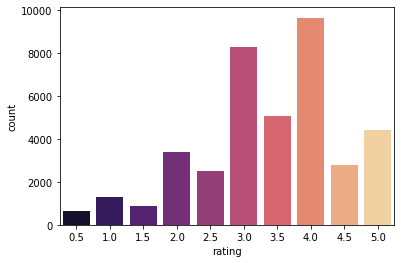

In [22]:
comedy_rates=movies_rates[movies_rates["genres"]=="Comedy"]["rating"]
sns.countplot(comedy_rates, palette="magma")

In [25]:
action_rates=movies_rates[movies_rates["genres"]=="Action"]["rating"]
action_mean=round(action_rates.mean(),2)
print(f"Średnia ocena wszystkich filmów akcji wynosi {action_mean}.")

Średnia ocena wszystkich filmów akcji wynosi 3.45.


In [47]:
action_movies=movies_rates[movies_rates["genres"]=="Action"]
action_stats=action_movies.groupby(['movieId', 'title'])['rating'].agg(["count", "mean"])
C = action_stats['count'].mean()
m = action_stats['mean'].mean()
def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return bayesian_avg
bayesian_avg_ratings = action_movies.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
action_stats_with_bayes = action_stats.merge(bayesian_avg_ratings, on='movieId')
action_stats
# action_stats.sort_values(by="bayesian_avg", ascending=False)
# action_stats

,,count,mean
movieId,title,,
6,Heat (1995),102,3.946078
9,Sudden Death (1995),16,3.125000
10,GoldenEye (1995),132,3.496212
15,Cutthroat Island (1995),13,3.000000
20,Money Train (1995),15,2.500000
...,...,...,...
189547,Iron Soldier (2010),1,1.000000
191005,Gintama (2017),1,4.500000
193565,Gintama: The Movie (2010),1,3.500000
